In [2]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
train = pd.read_csv(r'C:\Users\User\Downloads\train_Df64byy.csv')
test = pd.read_csv(r'C:\Users\User\Downloads\test_YCcRUnU.csv')

In [4]:
# Outlier Treatment
def remove_outliers(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return upper_range,lower_range

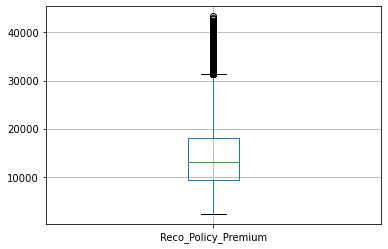

In [5]:
train.boxplot(column = ['Reco_Policy_Premium'])
plt.show()

In [6]:
upper_bound,lower_bound = remove_outliers(train['Reco_Policy_Premium'])
train['Reco_Policy_Premium'] = np.where(train['Reco_Policy_Premium']>=upper_bound,upper_bound,train['Reco_Policy_Premium'])
train['Reco_Policy_Premium'] = np.where(train['Reco_Policy_Premium']<=lower_bound,lower_bound,train['Reco_Policy_Premium'])

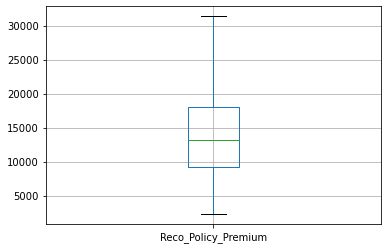

In [7]:
train.boxplot(column = ['Reco_Policy_Premium'])
plt.show()

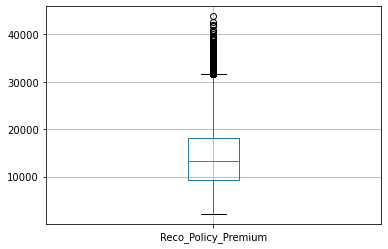

In [8]:
test.boxplot(column = ['Reco_Policy_Premium'])
plt.show()

In [9]:
upper_bound,lower_bound = remove_outliers(test['Reco_Policy_Premium'])
test['Reco_Policy_Premium'] = np.where(test['Reco_Policy_Premium']>=upper_bound,upper_bound,test['Reco_Policy_Premium'])
test['Reco_Policy_Premium'] = np.where(test['Reco_Policy_Premium']<=lower_bound,lower_bound,test['Reco_Policy_Premium'])

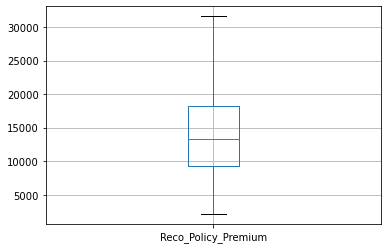

In [10]:
test.boxplot(column = ['Reco_Policy_Premium'])
plt.show()

In [11]:
from scipy.stats import mode

In [12]:
train['Holding_Policy_Type'].fillna((train['Holding_Policy_Type'].mean()),inplace = True)
train['Holding_Policy_Duration'].fillna(mode(train['Holding_Policy_Duration']).mode[0], inplace=True)
train['Health Indicator'].fillna(mode(train['Health Indicator']).mode[0], inplace=True)

In [13]:
train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [14]:
test['Holding_Policy_Type'].fillna((test['Holding_Policy_Type'].mean()),inplace = True)
test['Holding_Policy_Duration'].fillna(mode(test['Holding_Policy_Duration']).mode[0], inplace=True)
test['Health Indicator'].fillna(mode(test['Health Indicator']).mode[0], inplace=True)

In [15]:
test.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [16]:
train = pd.get_dummies(train, columns = ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Duration'],prefix = '',prefix_sep = '')
test = pd.get_dummies(test, columns = ['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Duration'],prefix = '',prefix_sep = '')

In [17]:
train_data=train

In [18]:
X = train_data.drop(labels=['Response'], axis=1)
y = train_data['Response'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=42)

In [19]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((43249, 73), (43249,), (7633, 73), (7633,))

In [20]:
from math import sqrt 
from sklearn.metrics import roc_auc_score

In [23]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'num_leaves':20,
         'boosting': 'dart',  
         'metric': 'mae',
         'learning_rate': 0.01, 
         'num_iterations': 1000,
         'num_leaves': 80,
         'max_depth': 6,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 142,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('roc_auc_score:', roc_auc_score(y_cv,y_pred_lgbm))

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Number of data points in the train set: 43249, number of used features: 73
[LightGBM] [Info] Start training from score 0.239243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

C:\Users\User\anaconda3\lib\site-packages\lightgbm\callback.py:186: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[800]	valid_0's l1: 0.332816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

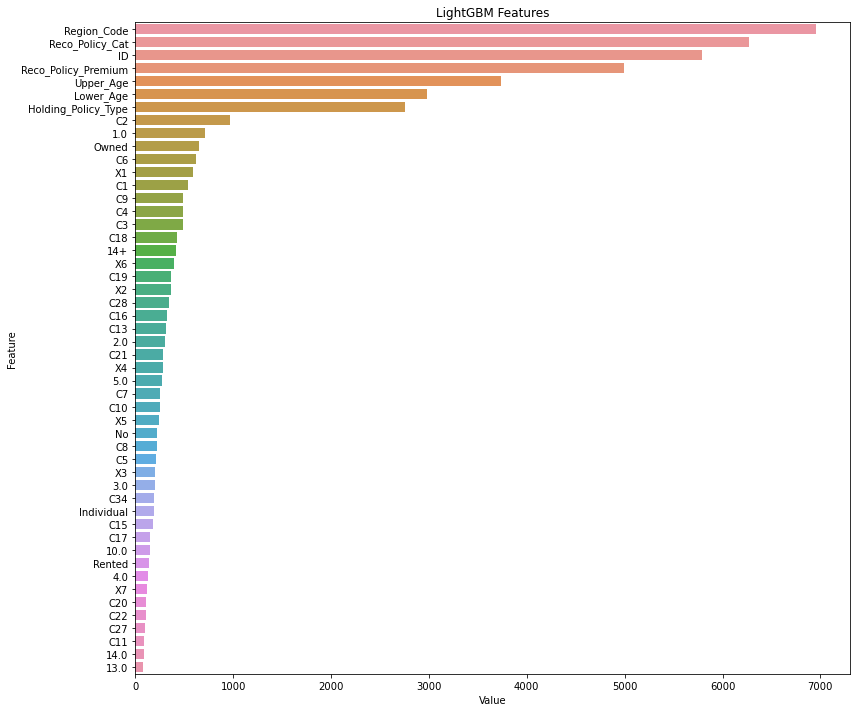

In [24]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [25]:
test_data = test

In [27]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=
             30, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=100, max_depth=31, learning_rate=0.01, n_estimators=1000, min_child_samples=20, subsample=0.80)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)

    y_pred_lgbm = lgbm.predict(X_test)
    print("roc_auc_score: ", roc_auc_score(y_test, y_pred_lgbm))

    errlgb.append(roc_auc_score(y_test, y_pred_lgbm))
    p = lgbm.predict(test_data)
    y_pred_totlgb.append(p)

roc_auc_score:  0.6762835405952446
roc_auc_score:  0.7130701615457713
roc_auc_score:  0.6919322320240343
roc_auc_score:  0.709997816437779
roc_auc_score:  0.6894237945962083
roc_auc_score:  0.6953928983268836
roc_auc_score:  0.6672444410950276
roc_auc_score:  0.6559183325114745
roc_auc_score:  0.6594894413258487
roc_auc_score:  0.6689069061704932
roc_auc_score:  0.6971313558882422
roc_auc_score:  0.6876748281935283
roc_auc_score:  0.6911075114546212
roc_auc_score:  0.658296528588388
roc_auc_score:  0.680708690684863
roc_auc_score:  0.6740524579575078
roc_auc_score:  0.671651715134925
roc_auc_score:  0.6948797036622361
roc_auc_score:  0.6763848642091785
roc_auc_score:  0.7006844999427196
roc_auc_score:  0.6701165199770136
roc_auc_score:  0.6939251168602768
roc_auc_score:  0.692798429640535
roc_auc_score:  0.6861817430427222
roc_auc_score:  0.6785987937639875
roc_auc_score:  0.6799222086551835
roc_auc_score:  0.6855228582345007
roc_auc_score:  0.6856627703873075
roc_auc_score:  0.6701747

In [28]:
np.mean(errlgb,0)

0.6826699985085222

In [29]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([0.30318366, 0.41660076, 0.32531885, ..., 0.02593086, 0.25186246,
       0.15546385])

In [31]:
submission = pd.DataFrame({
        "ID": test['ID'],
        "Response": lgbm_final
    })
submission.to_csv('lgm.csv', index=False)
print(submission)

          ID  Response
0      50883  0.303184
1      50884  0.416601
2      50885  0.325319
3      50886  0.195998
4      50887  0.307060
...      ...       ...
21800  72683  0.163541
21801  72684  0.231165
21802  72685  0.025931
21803  72686  0.251862
21804  72687  0.155464

[21805 rows x 2 columns]


In [32]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.01, n_estimators=100, random_state=101, subsample=0.8, loss='ls')
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
print('score', roc_auc_score(y_cv, y_pred))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1824           0.0001           14.37s
         2           0.1825           0.0001           13.09s
         3           0.1814           0.0001           12.29s
         4           0.1820           0.0001           11.93s
         5           0.1819           0.0001           11.64s
         6           0.1813           0.0001           11.45s
         7           0.1818           0.0001           11.23s
         8           0.1819           0.0001           11.08s
         9           0.1819           0.0001           10.96s
        10           0.1812           0.0001           10.94s
        20           0.1811           0.0001            9.75s
        30           0.1808           0.0001            8.99s
        40           0.1802           0.0001            7.86s
        50           0.1802           0.0001            6.64s
        60           0.1791           0.0001            5.35s
       

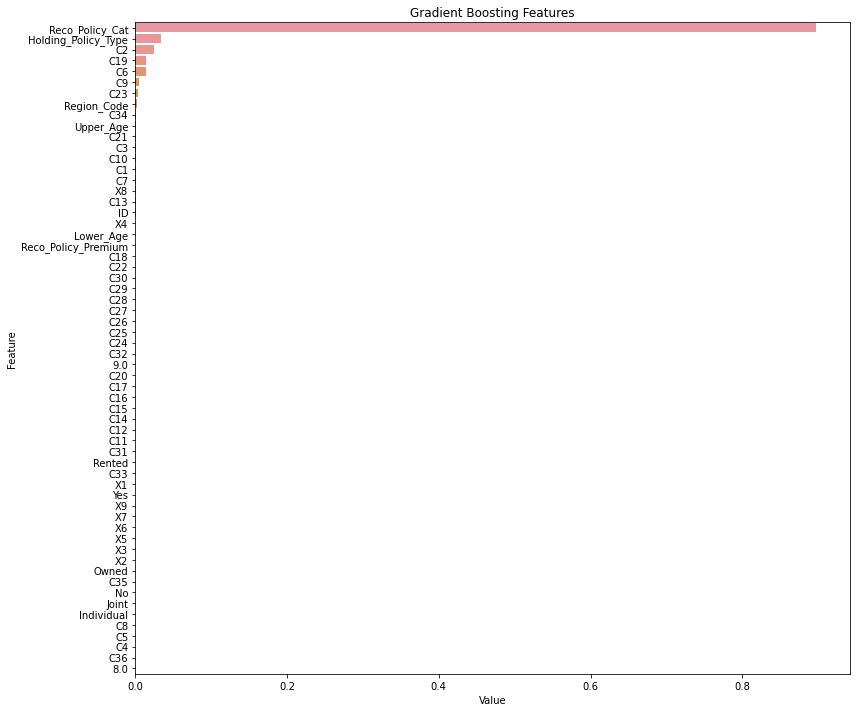

In [33]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, X.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()

In [34]:
from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=4, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=101, subsample=0.9)
    #gb = GradientBoostingRegressor(learning_rate=0.01, n_estimators=100, random_state=101, subsample=0.8,loss='ls')
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print('Score', roc_auc_score(y_test, y_pred, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None))

    errgb.append(roc_auc_score(y_test, y_pred, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None))
    p = gb.predict(test_data)
    y_pred_totgb.append(p)

Score 0.6372317401729166
Score 0.6335016598959798
Score 0.6424831331266958
Score 0.6379916606160708


In [35]:
np.mean(errgb,0)

0.6378020484529158

In [36]:
final = np.mean(y_pred_totgb,0)
final

array([0.19011334, 0.35326132, 0.23977521, ..., 0.00158839, 0.17744477,
       0.15128954])

In [37]:
submission = pd.DataFrame({
        "ID": test['ID'],
        "Response": final
    })
submission.to_csv('final.csv', index=False)
print(submission)

          ID  Response
0      50883  0.190113
1      50884  0.353261
2      50885  0.239775
3      50886  0.195012
4      50887  0.217996
...      ...       ...
21800  72683  0.203955
21801  72684  0.233717
21802  72685  0.001588
21803  72686  0.177445
21804  72687  0.151290

[21805 rows x 2 columns]
